In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

In [3]:
# Categorical features from data-cleanup.ipynb
cat_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method']

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)

# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)

In [4]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

In [5]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
count,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,8.306850e+05,830685.000000,830685.000000,830685.000000,830685.000000,...,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000
mean,14325.615727,14312.102722,14279.615080,41.796970,436.406142,7.529807e+04,0.793832,518.830457,17.395740,0.307000,...,0.022308,0.012747,0.004003,0.002244,0.504204,0.495796,0.994908,0.005092,0.998617,0.001383
std,8509.996557,8503.337725,8508.362095,10.272417,255.953656,6.557081e+04,0.404553,314.240924,8.984933,0.857069,...,0.147684,0.112182,0.063140,0.047317,0.499983,0.499983,0.071178,0.071178,0.037166,0.037166
min,500.000000,500.000000,0.000000,36.000000,4.000000,0.000000e+00,0.000000,7.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,7975.000000,36.000000,251.000000,4.520000e+04,1.000000,234.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,36.000000,377.000000,6.500000e+04,1.000000,481.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,36.000000,576.000000,9.000000e+04,1.000000,823.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,40000.000000,40000.000000,40000.000000,60.000000,1714.000000,9.550000e+06,1.000000,999.000000,999.000000,39.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()
# top_corr_features = corrmat.index[abs(corrmat["int_rate"])>0.5]
# plt.figure(figsize=(100,100))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    # ax1.set_xticklabels(labels,fontsize=6)
    # ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax) # , ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [7]:
corrmat['loan_status']

loan_amnt                       -0.064021
funded_amnt                     -0.064132
funded_amnt_inv                 -0.063865
term                            -0.177266
installment                     -0.046476
annual_inc                       0.046371
loan_status                      1.000000
zip_code                         0.016527
dti                             -0.120715
delinq_2yrs                     -0.021748
inq_last_6mths                  -0.058934
mths_since_last_delinq          -0.005921
mths_since_last_record          -0.023344
open_acc                        -0.034570
pub_rec                         -0.023285
revol_bal                        0.013427
revol_util                      -0.072684
total_acc                        0.011113
collections_12_mths_ex_med      -0.018195
mths_since_last_major_derog     -0.025663
acc_now_delinq                  -0.007142
tot_coll_amt                    -0.000020
tot_cur_bal                      0.061666
open_acc_6m                     -0

In [8]:
# top_corr_features = corrmat.loc[abs(corrmat['loan_status']) > 0.1]
# plt.figure(figsize=(10,10))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
# sns.heatmap(top_corr_features.corr(), annot=True, cmap='RdYlGn')

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(type(get_top_abs_correlations(df, 3)))
print(get_top_abs_correlations(df, 50))

Top Absolute Correlations
<class 'pandas.core.series.Series'>
disbursement_method_Cash     disbursement_method_DirectPay     1.000000
application_type_Individual  application_type_Joint App        1.000000
initial_list_status_f        initial_list_status_w             1.000000
loan_amnt                    funded_amnt                       0.999263
funded_amnt                  funded_amnt_inv                   0.998497
loan_amnt                    funded_amnt_inv                   0.997613
num_actv_rev_tl              num_rev_tl_bal_gt_0               0.986859
tot_cur_bal                  tot_hi_cred_lim                   0.981071
funded_amnt                  installment                       0.954615
loan_amnt                    installment                       0.953506
funded_amnt_inv              installment                       0.953042
sec_app_open_acc             sec_app_num_rev_accts             0.923560
il_util                      all_util                          0.900204
op

In [10]:
# https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices
    
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=False).drop_duplicates()

# with pd.option_context('display.max_rows', 1000, 'display.max_columns', 3):
  # print(so)

/home/anilraj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 0.79 and sigma = 0.40


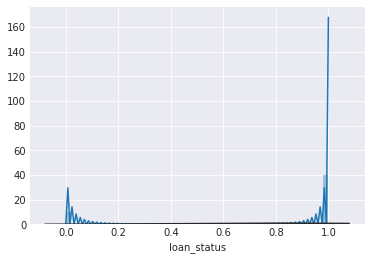

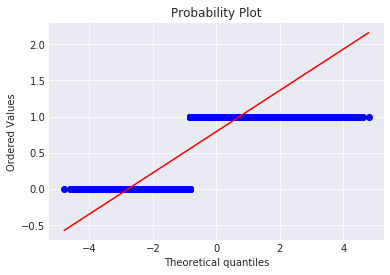

In [11]:
# Target Variable 
def check_skewness(col):
    sns.distplot(df[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(df[col], plot=plt)
    (mu, sigma) = norm.fit(df[col])
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

check_skewness('loan_status')

In [12]:
# Highly skewed features

skewed_features = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

,Skew
tot_coll_amt,868.224262
addr_state_IA,344.479732
sec_app_chargeoff_within_12_mths,291.800358
sec_app_collections_12_mths_ex_med,289.936477
sec_app_open_act_il,66.269959
sec_app_mths_since_last_major_derog,61.649797
sec_app_inq_last_6mths,59.804717
total_rev_hi_lim,57.101681
revol_bal_joint,51.782773
purpose_educational,50.920438


In [13]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed features to Box Cox transform'.format(skewness.shape[0]))

There are 221 skewed features to Box Cox transform


In [14]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [15]:
df = pd.get_dummies(df)
print(df.shape)
df

(830685, 221)


,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,22.782058,22.782058,22.782058,4.792130,11.101459,28.476974,0.730463,10.072965,4.003419,1.194318,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
1,15.489705,15.489705,15.489705,4.792130,6.615044,26.008617,0.730463,8.962610,2.055642,0.730463,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
2,15.489705,15.489705,15.489705,4.792130,6.533131,26.914539,0.730463,11.278207,4.003419,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
3,24.628632,24.628632,24.628632,5.684507,11.136082,31.310566,0.730463,10.758304,3.530419,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
4,12.125370,12.125370,12.125370,4.792130,4.647709,28.476974,0.730463,11.263544,3.011340,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
5,24.628632,24.628632,24.628632,4.792130,12.074291,29.588763,0.730463,6.881187,4.003419,0.730463,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
6,17.916752,17.916752,17.916752,4.792130,8.158133,29.588763,0.730463,11.421227,3.237728,1.820334,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
7,23.784389,23.784389,23.784389,5.684507,10.688390,30.822811,0.730463,12.082859,3.701973,0.000000,...,0.730463,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0
8,20.610004,20.610004,20.610004,4.792130,9.466329,29.239480,0.730463,9.272687,4.263161,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.000000,0.730463,0.0
9,16.878680,16.878680,16.878680,4.792130,7.497312,27.700055,0.730463,11.403697,4.003419,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.000000,0.730463,0.0


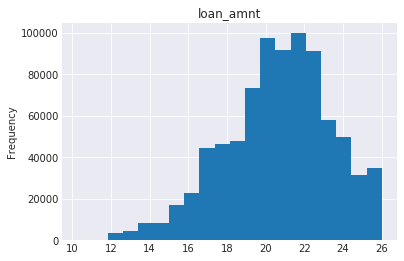

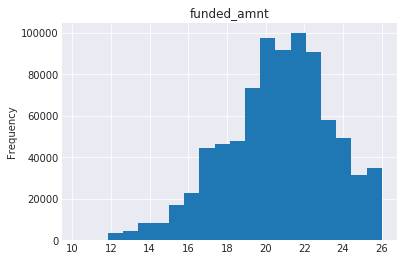

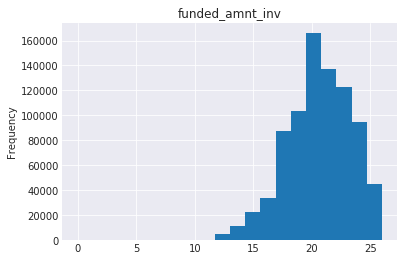

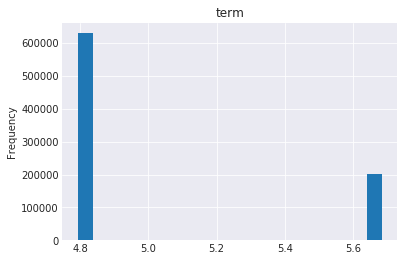

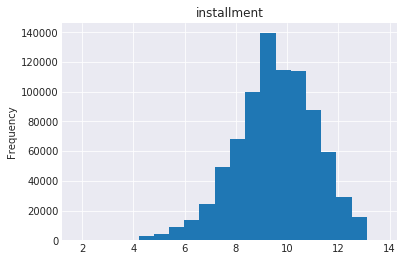

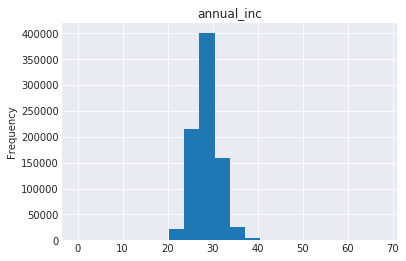

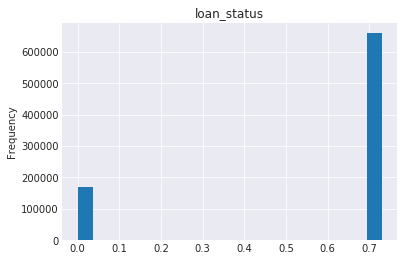

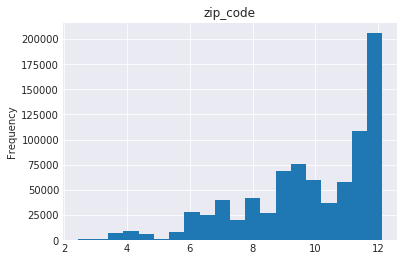

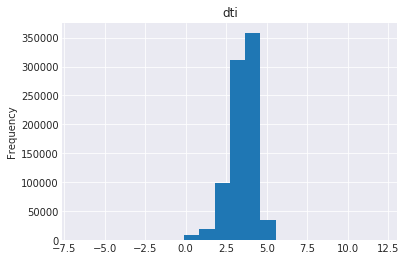

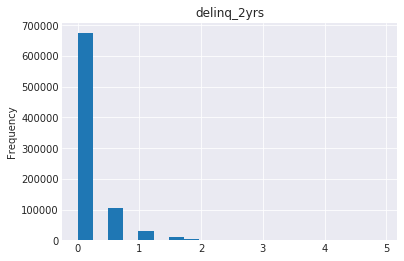

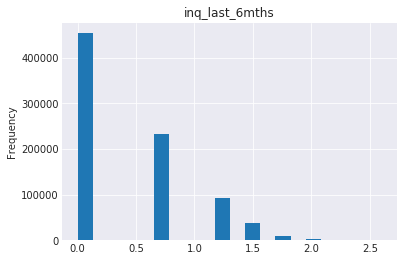

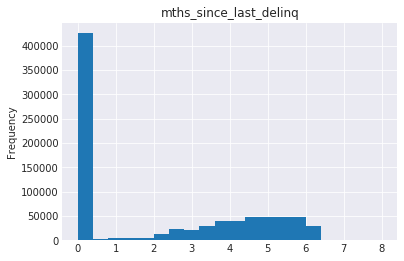

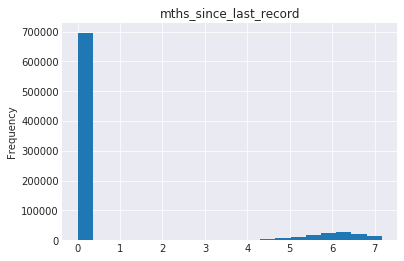

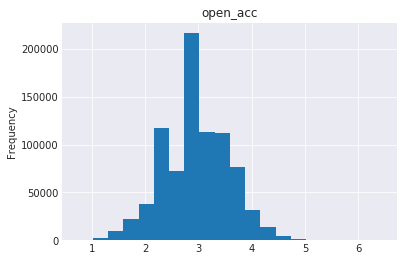

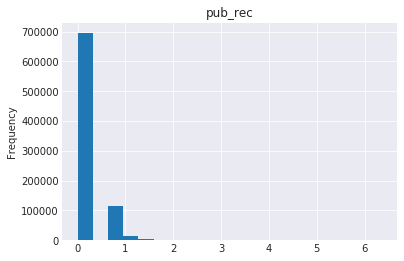

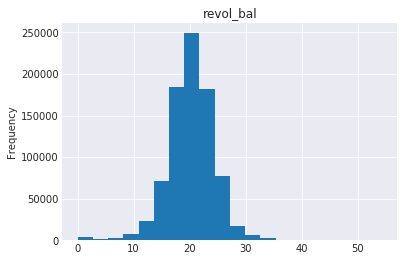

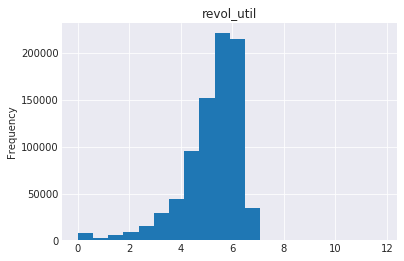

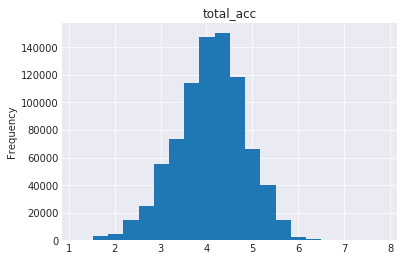

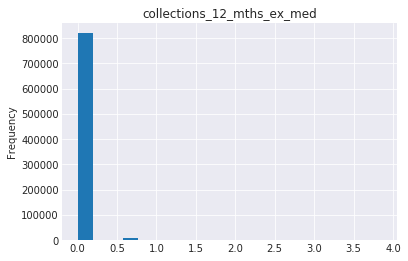

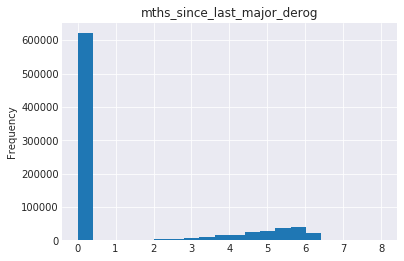

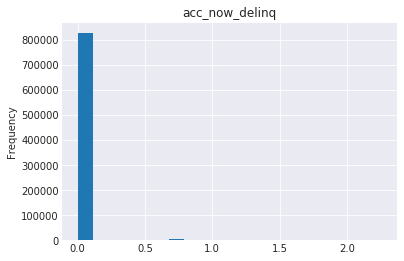

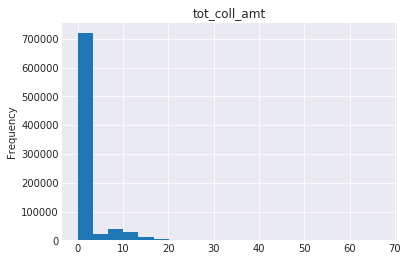

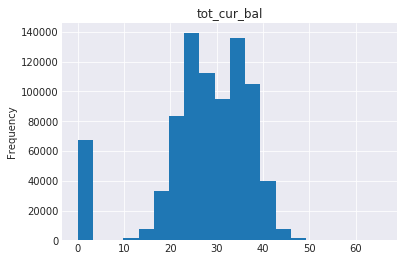

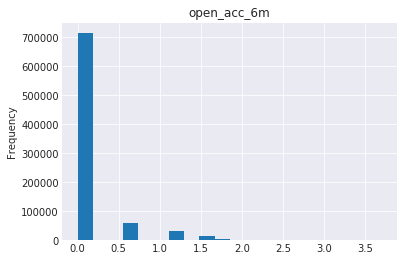

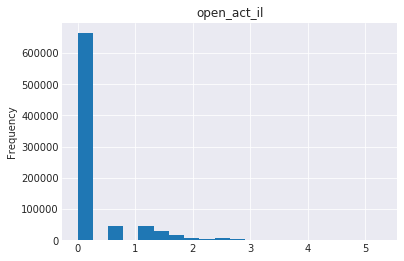

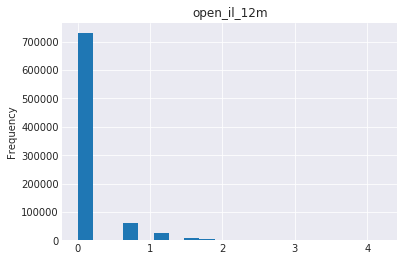

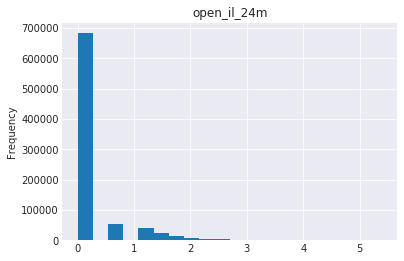

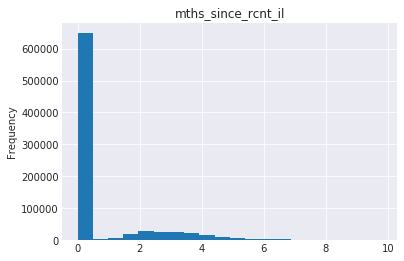

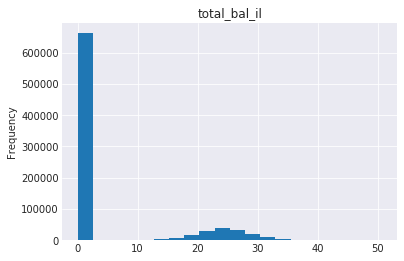

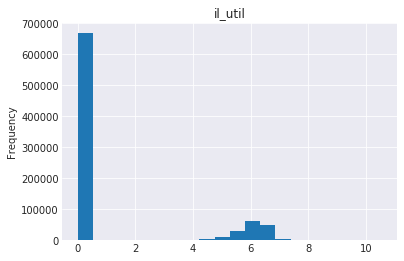

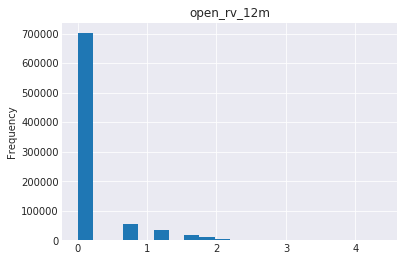

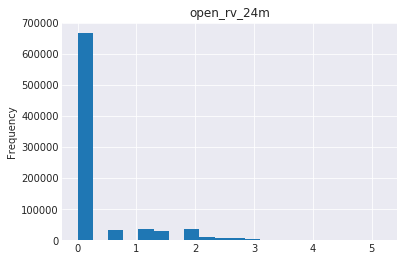

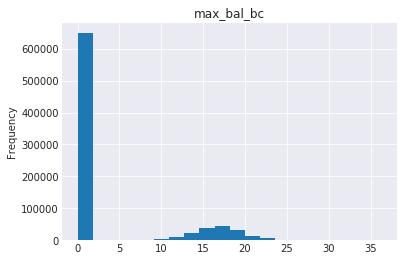

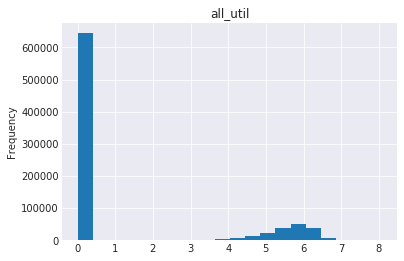

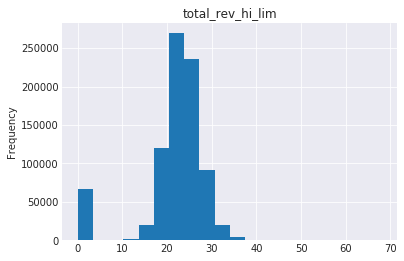

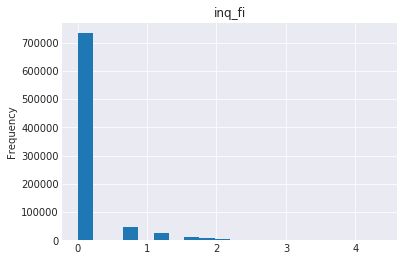

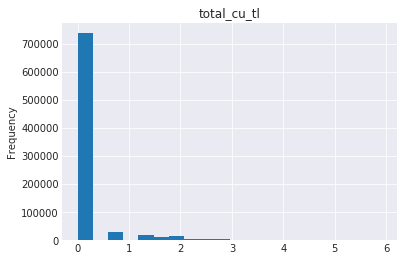

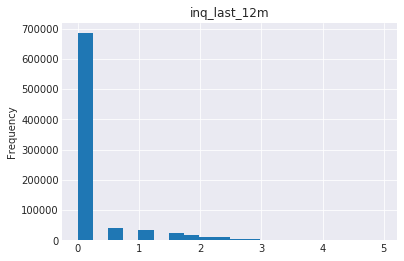

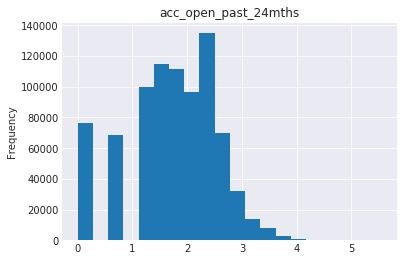

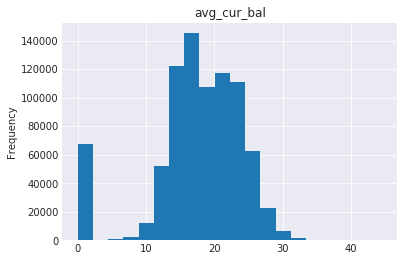

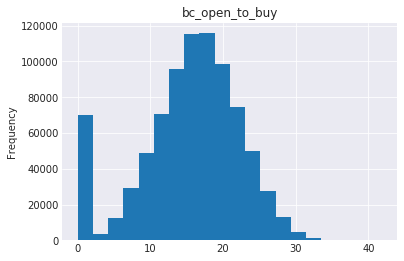

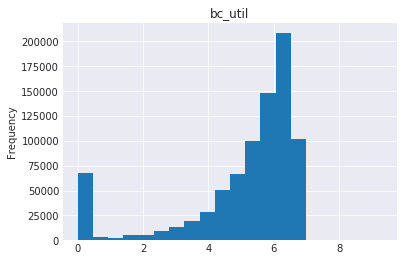

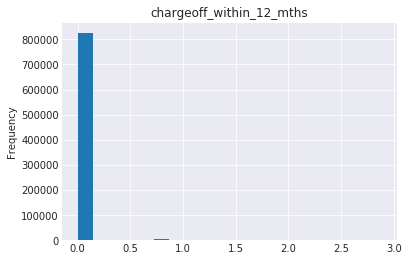

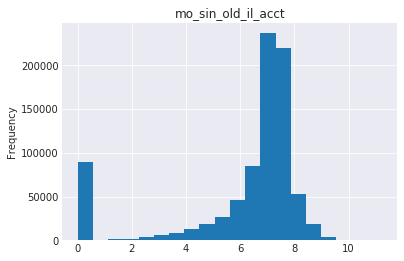

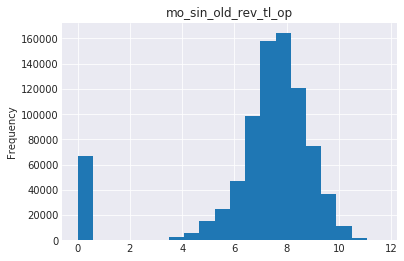

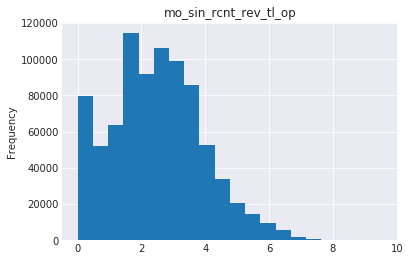

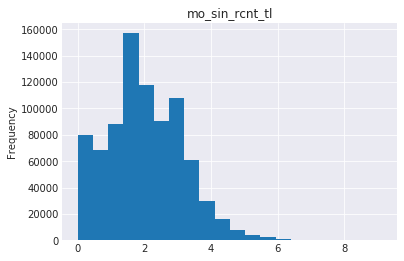

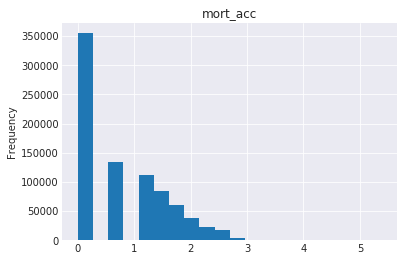

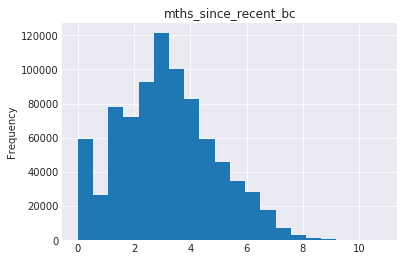

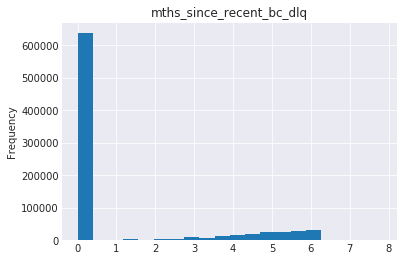

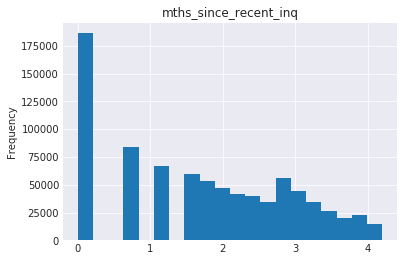

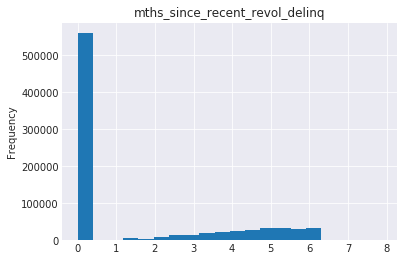

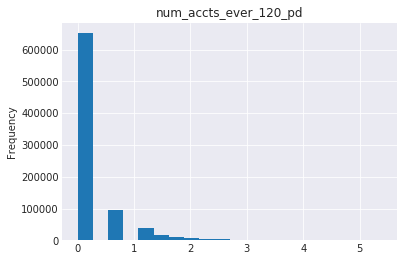

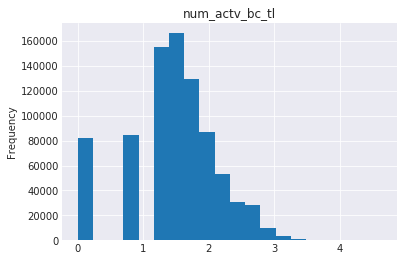

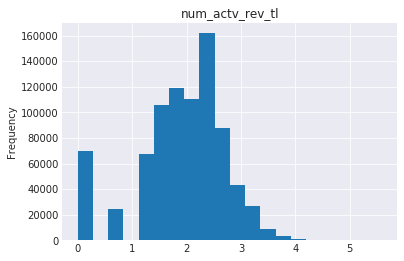

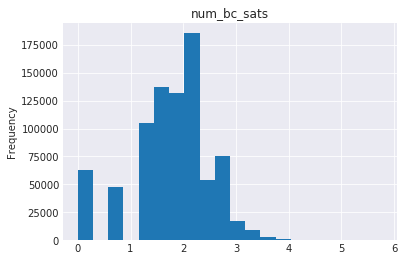

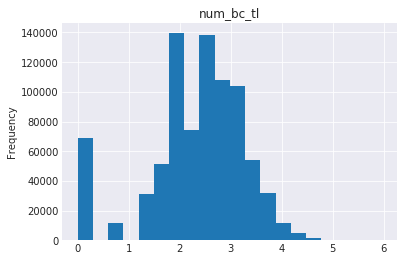

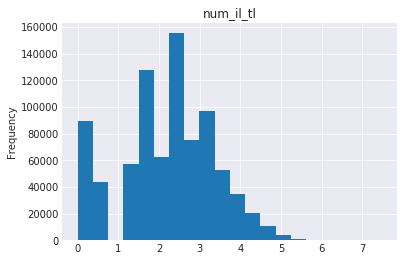

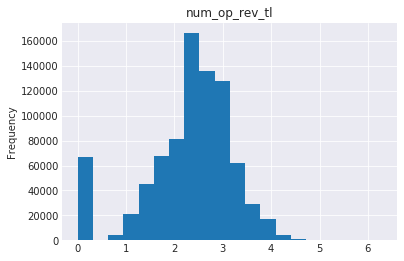

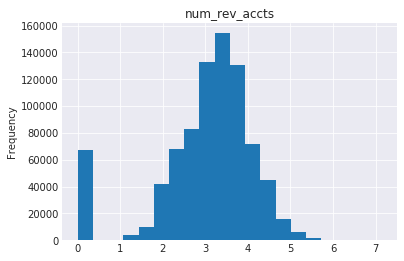

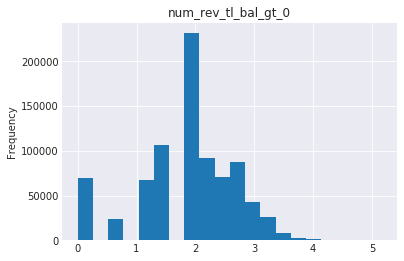

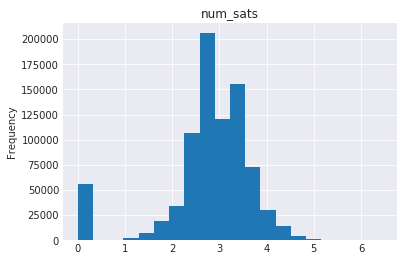

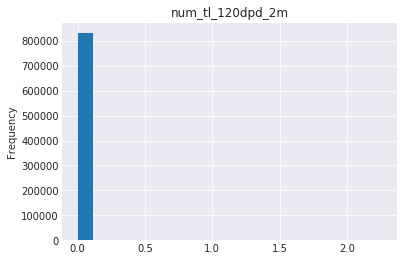

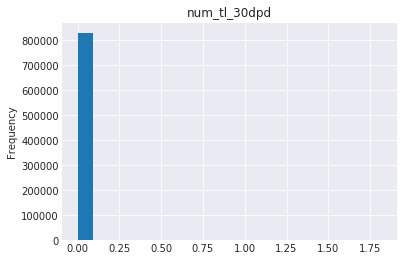

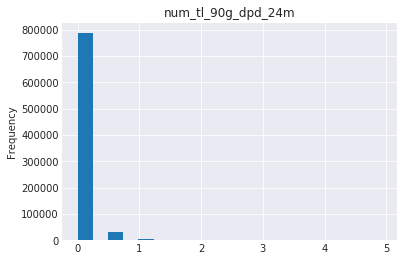

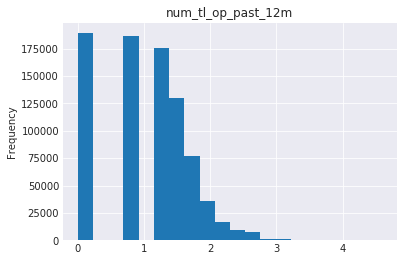

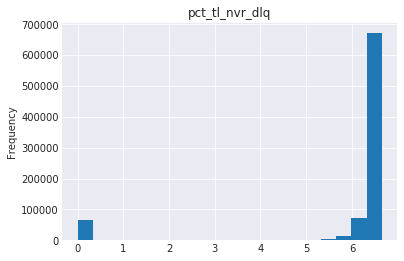

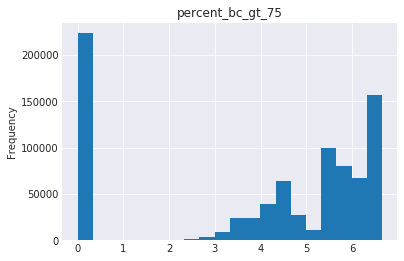

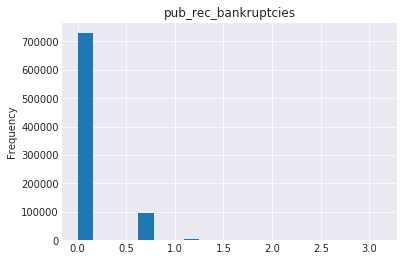

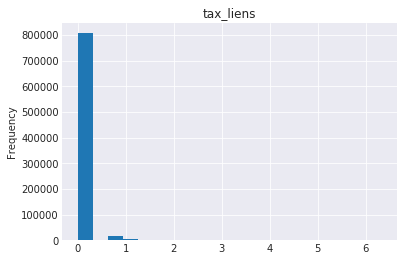

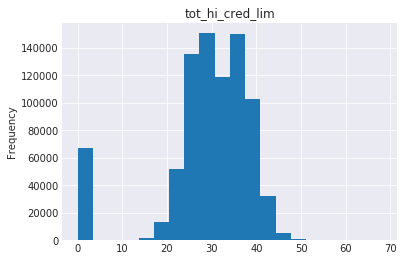

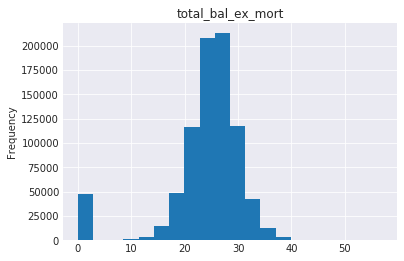

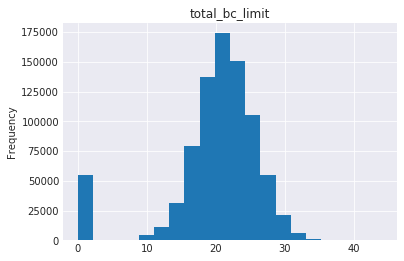

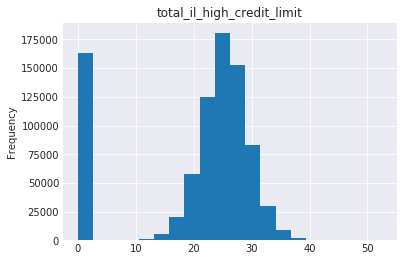

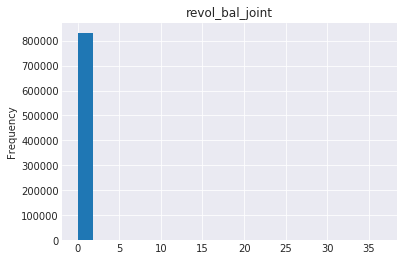

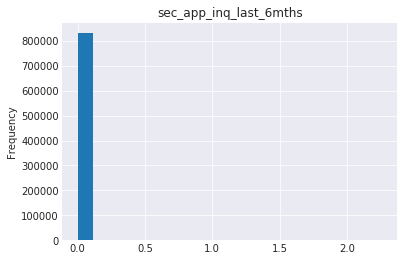

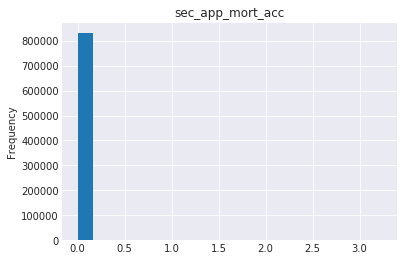

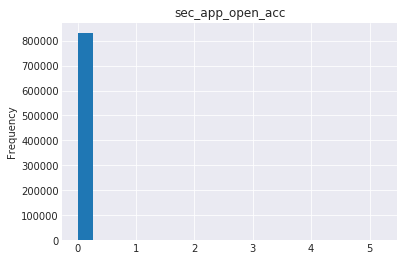

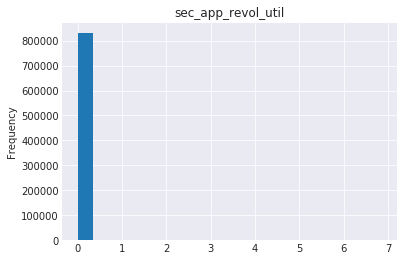

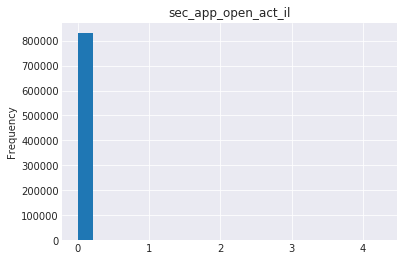

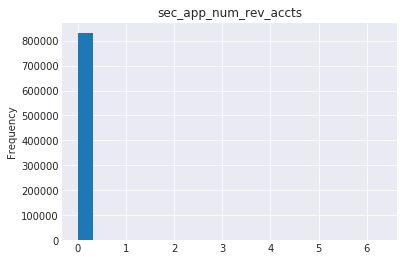

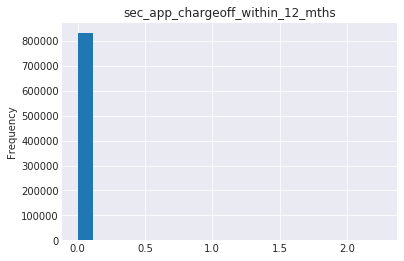

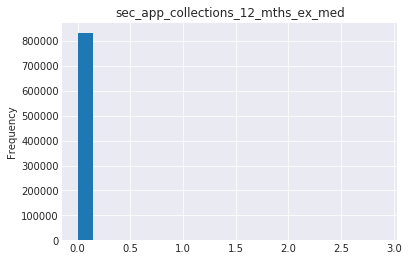

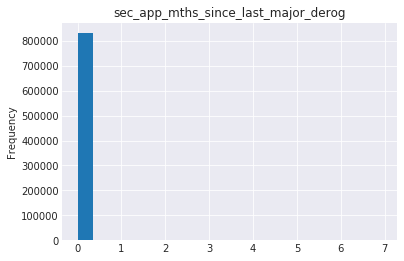

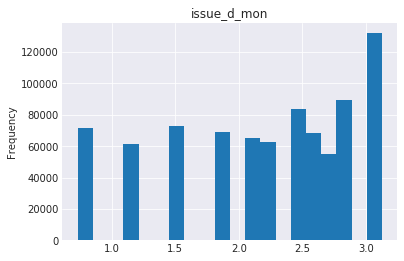

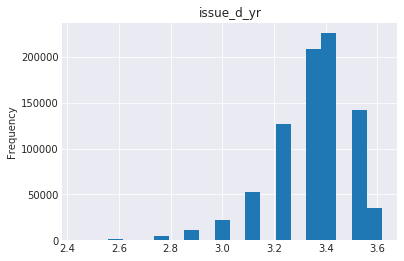

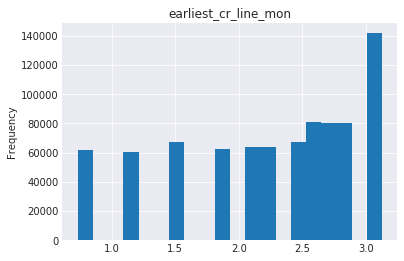

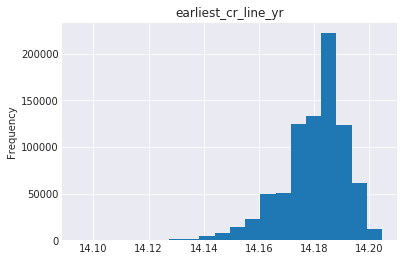

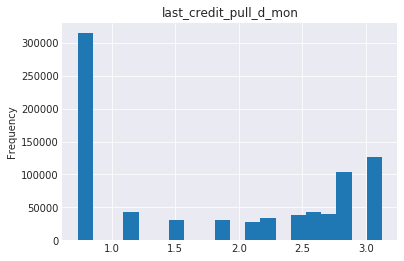

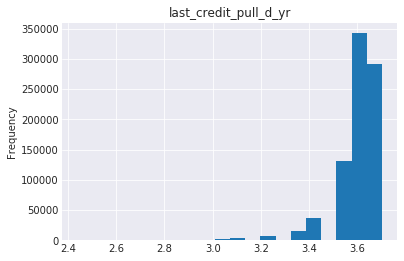

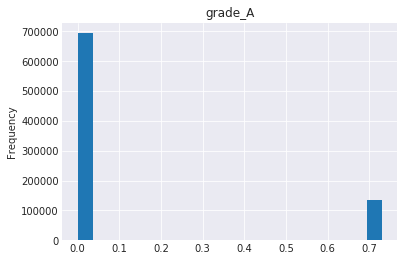

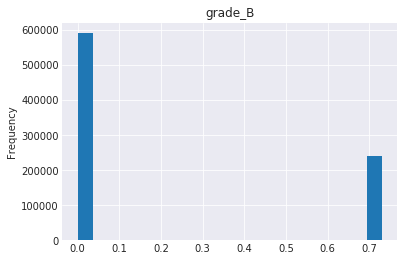

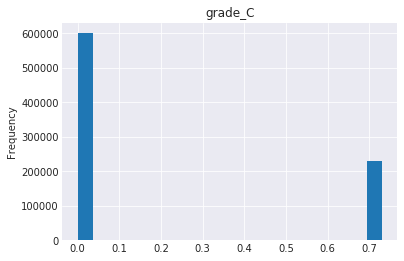

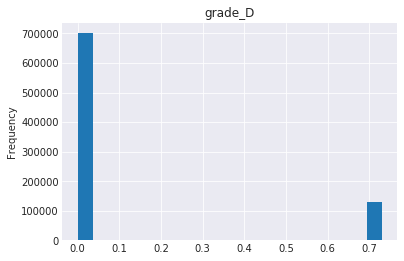

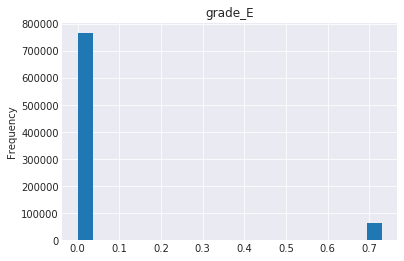

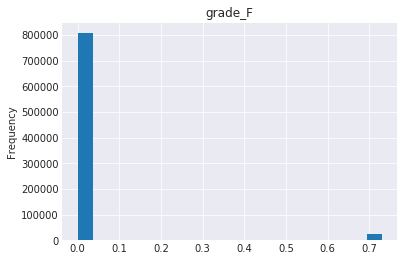

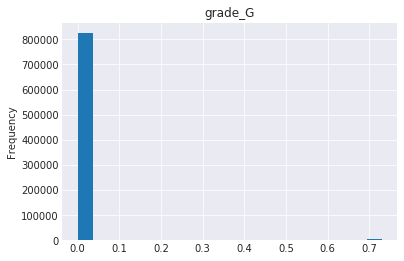

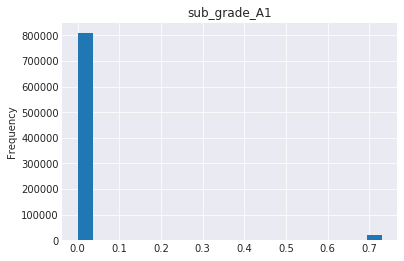

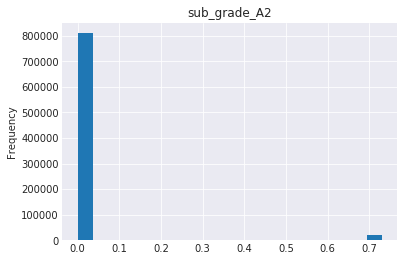

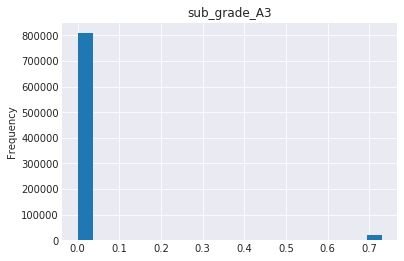

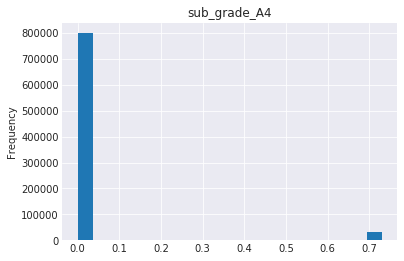

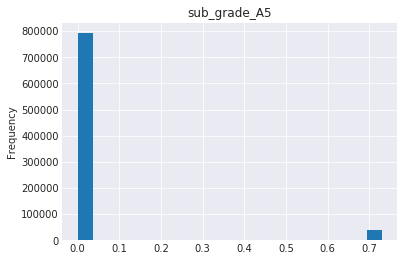

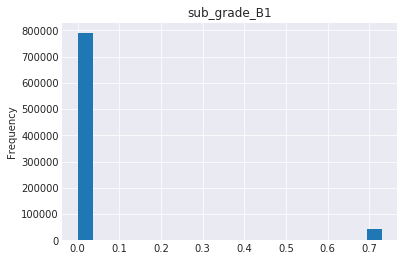

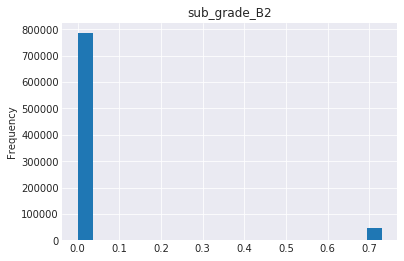

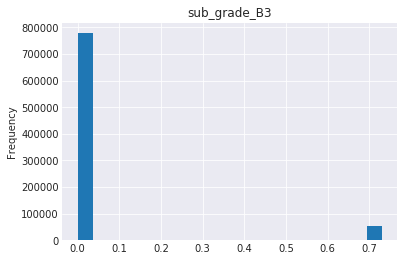

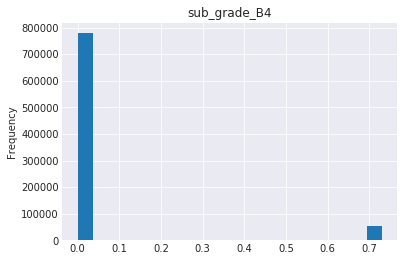

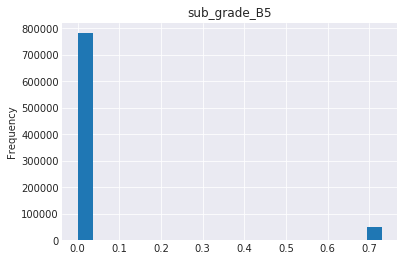

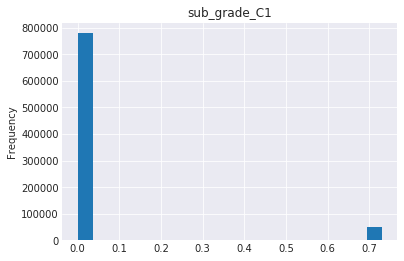

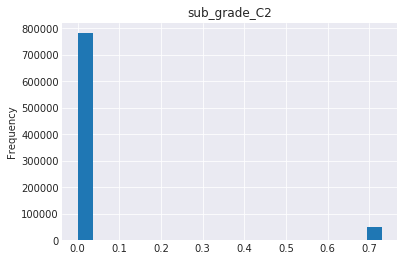

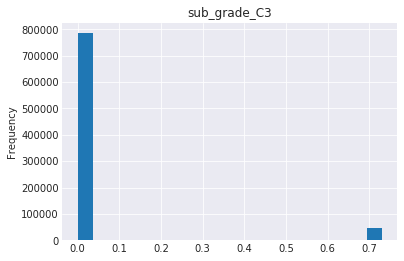

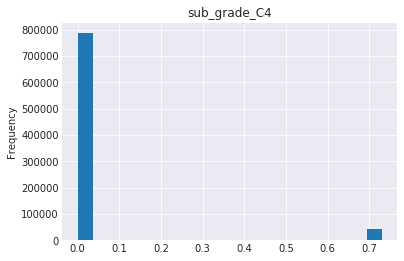

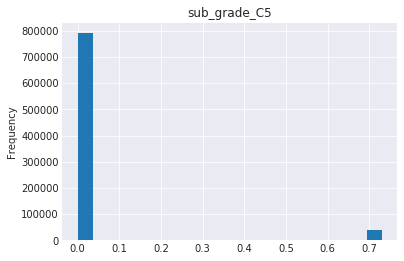

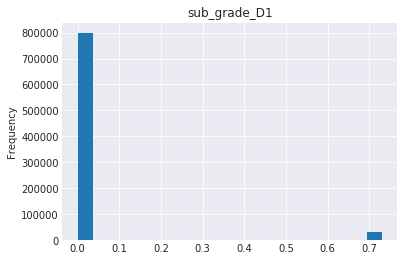

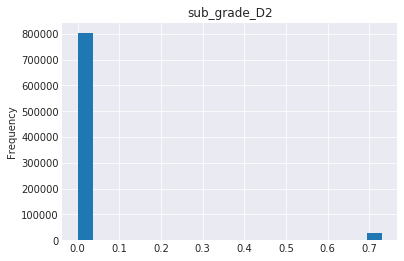

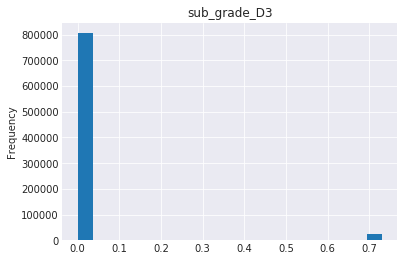

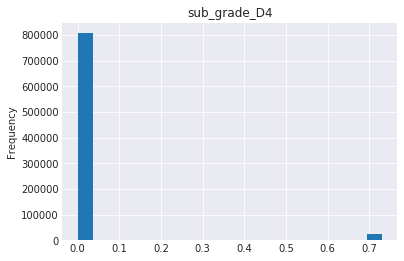

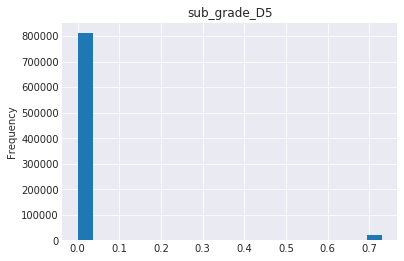

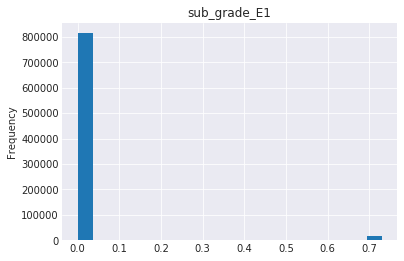

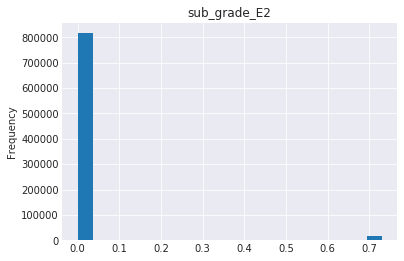

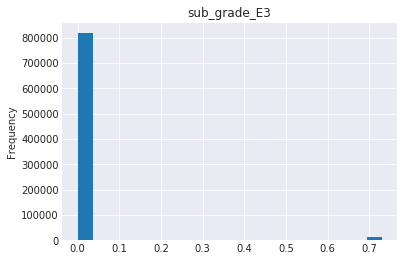

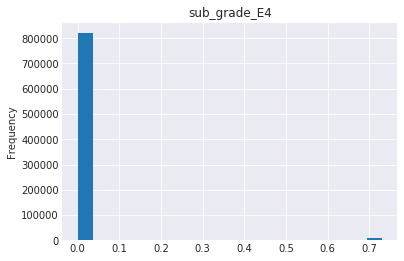

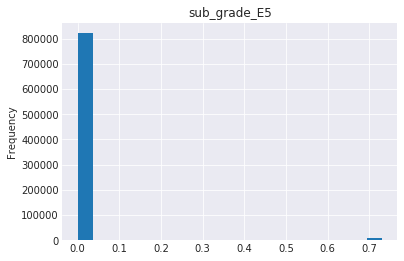

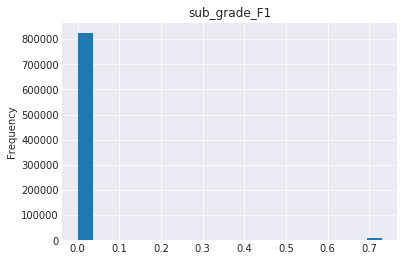

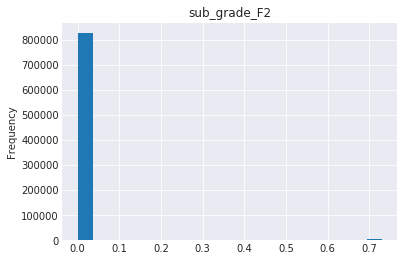

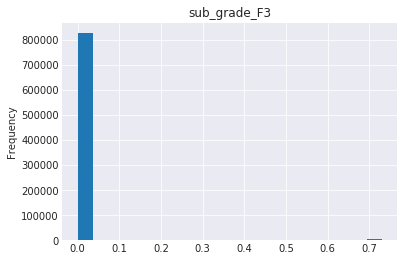

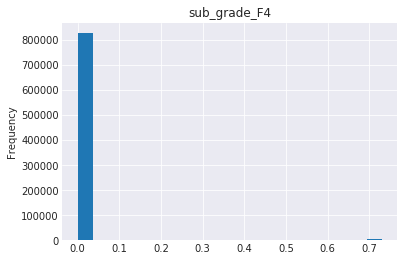

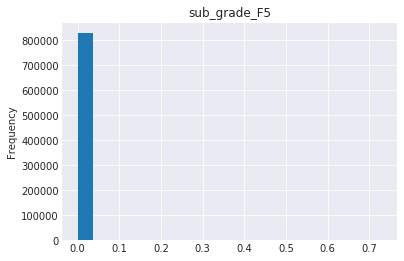

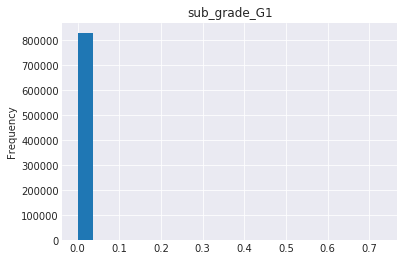

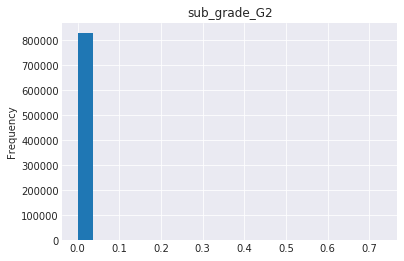

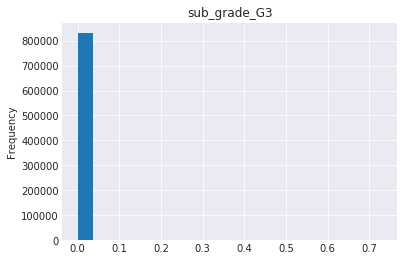

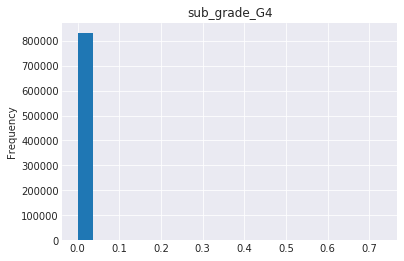

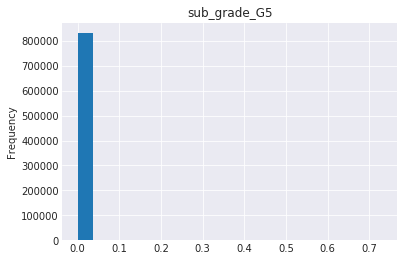

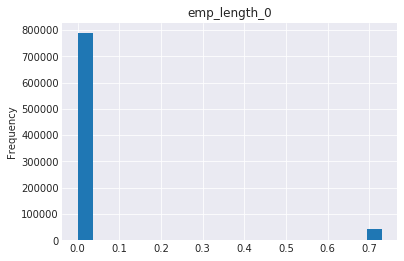

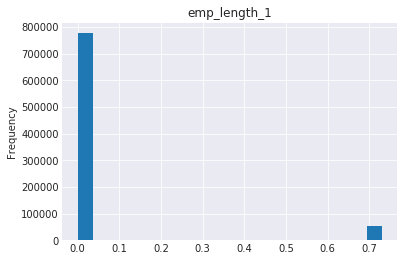

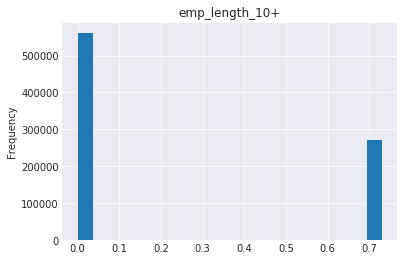

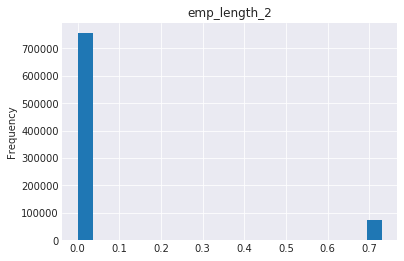

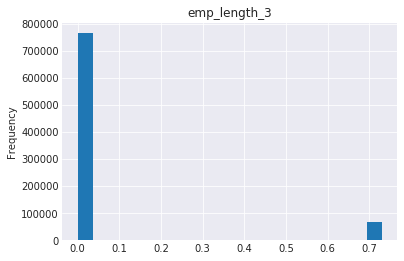

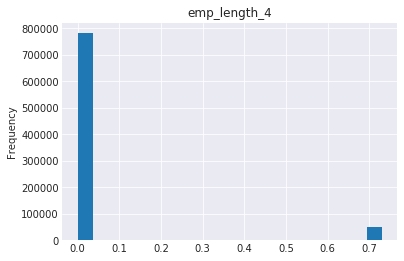

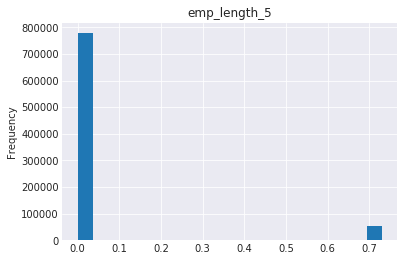

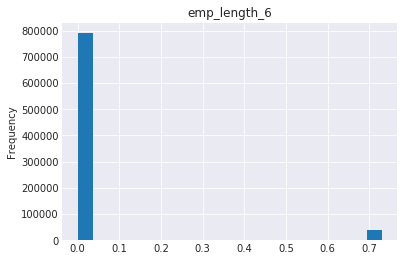

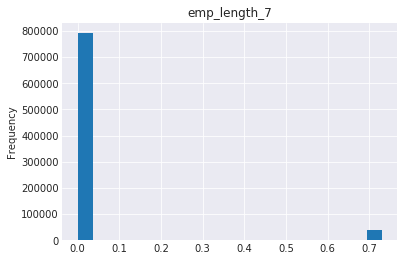

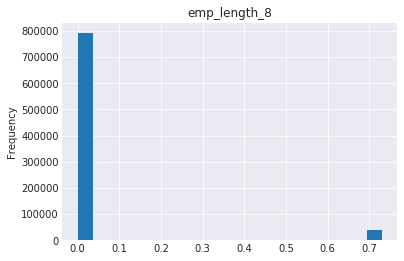

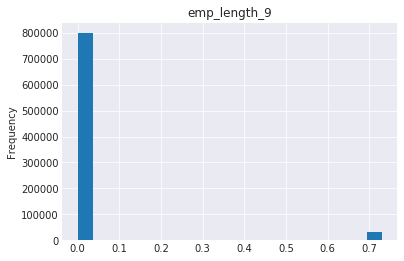

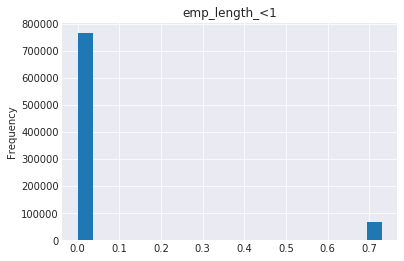

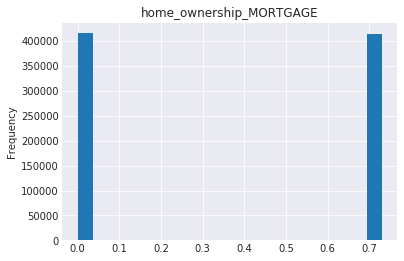

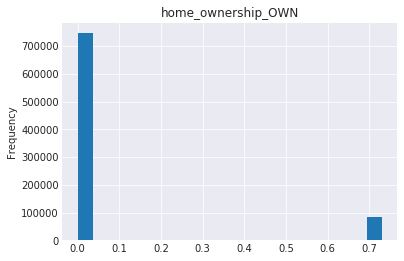

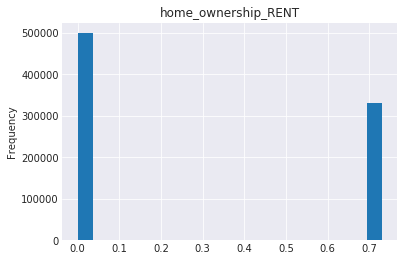

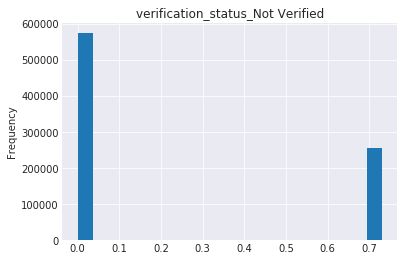

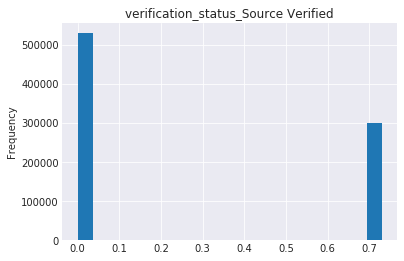

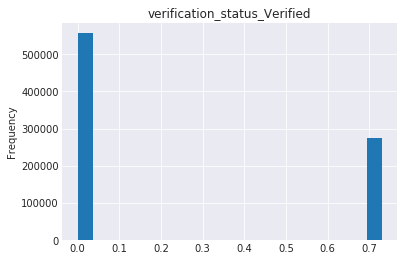

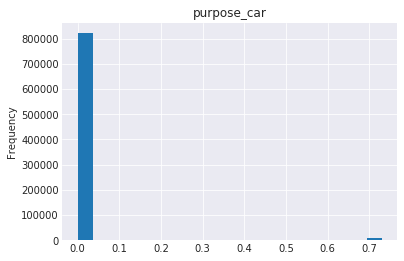

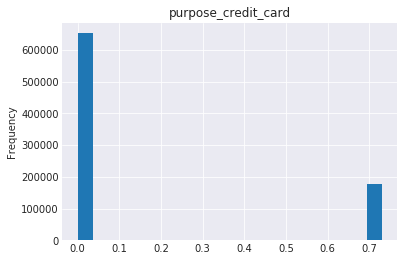

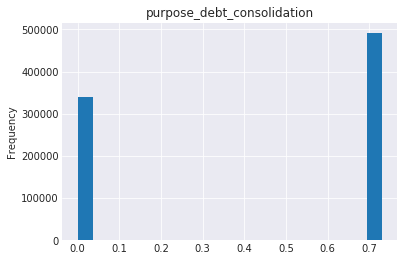

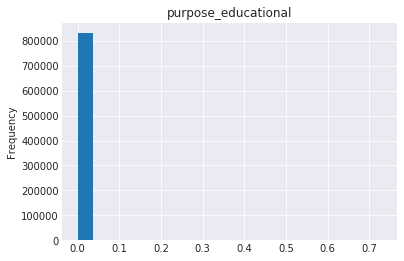

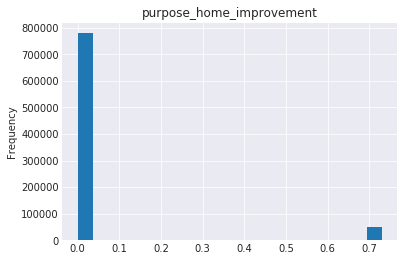

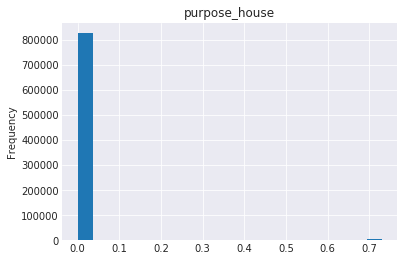

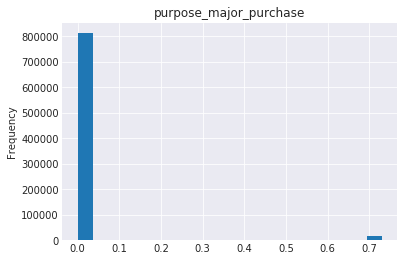

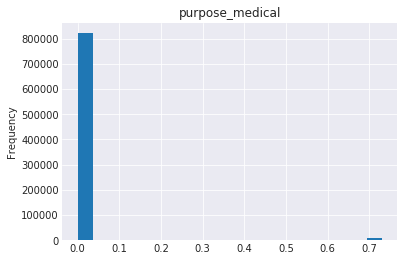

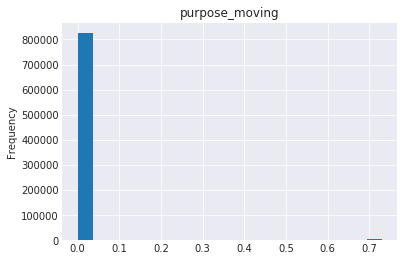

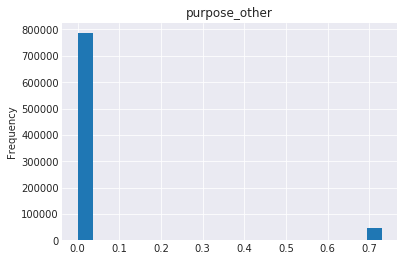

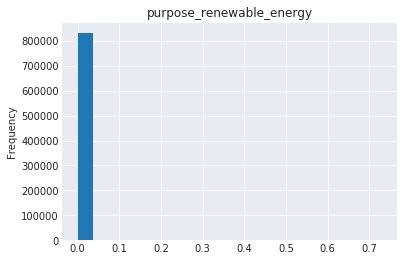

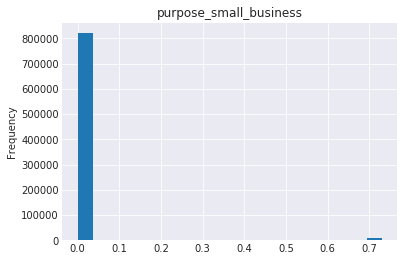

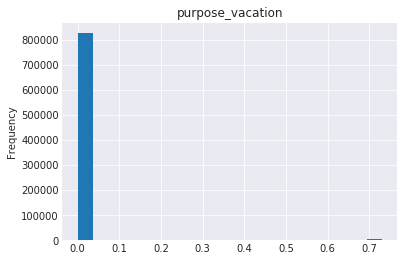

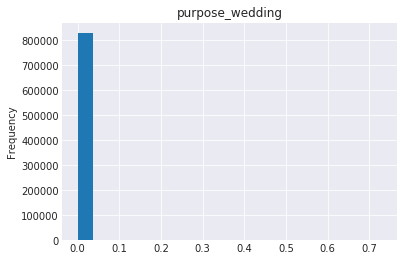

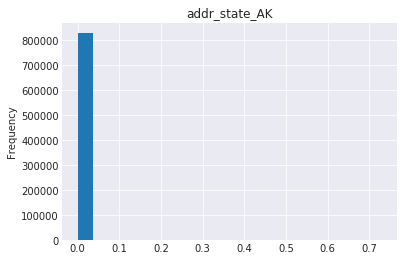

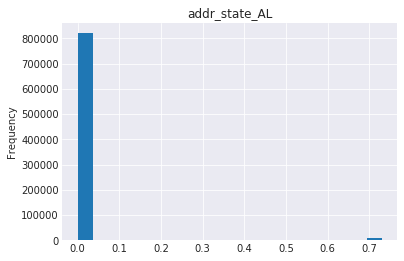

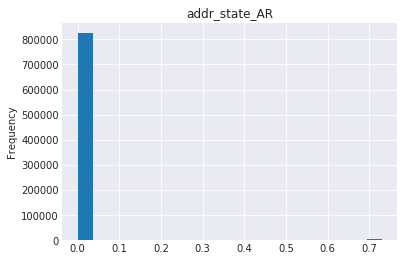

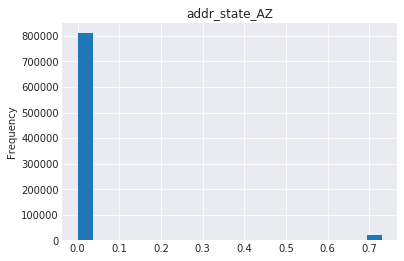

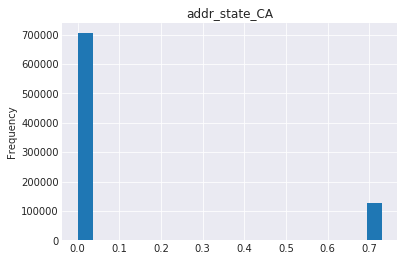

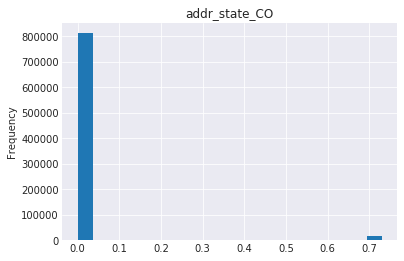

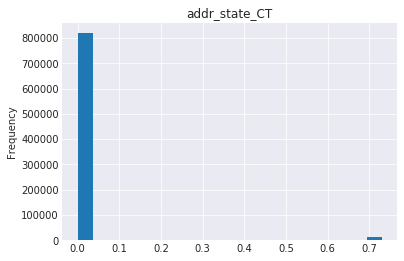

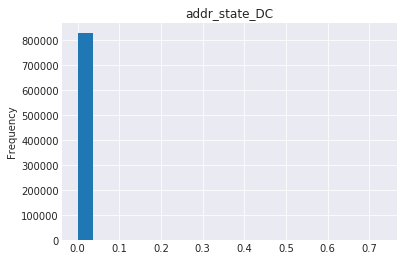

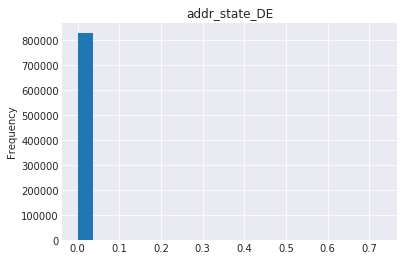

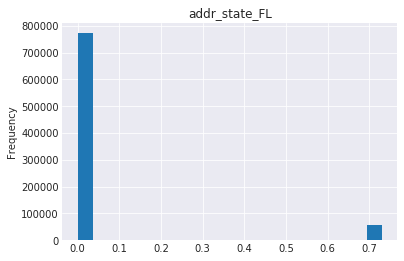

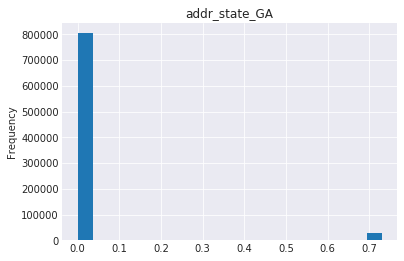

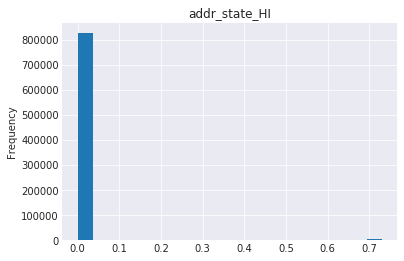

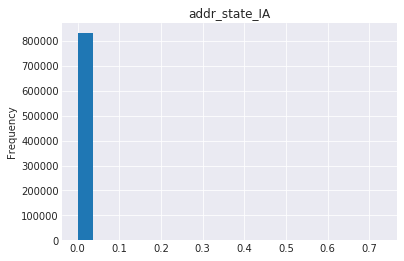

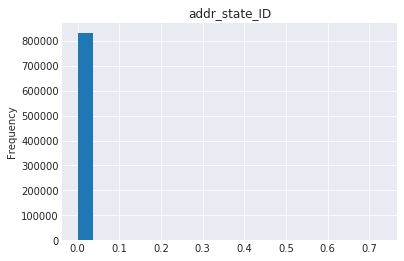

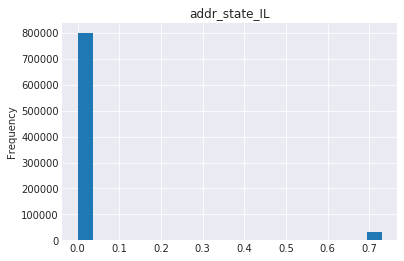

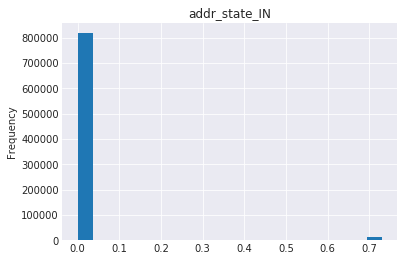

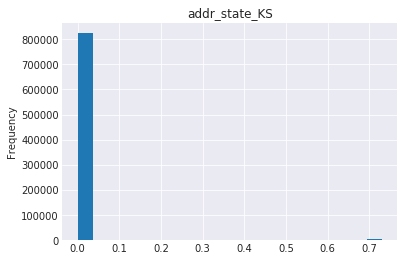

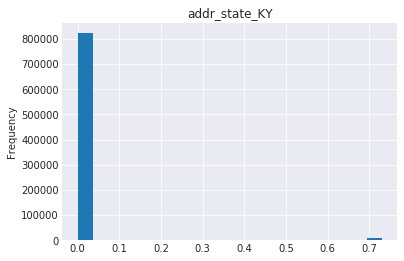

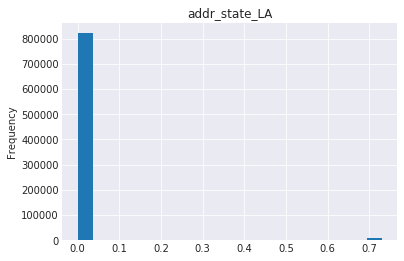

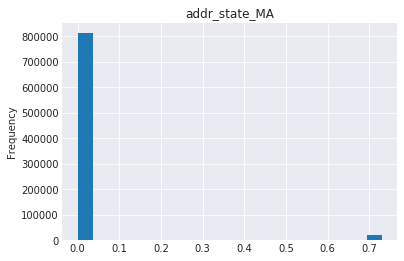

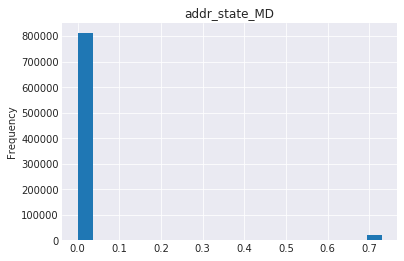

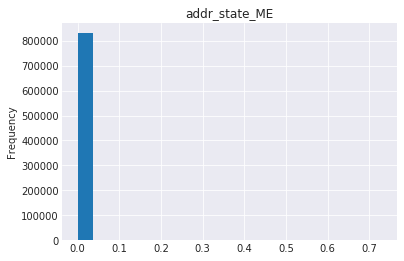

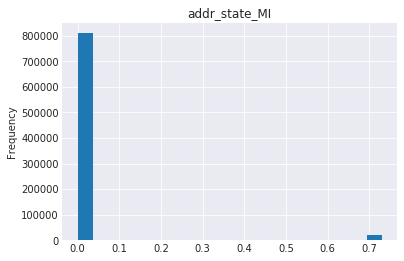

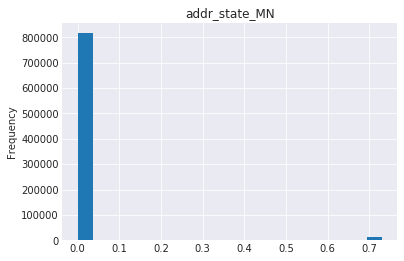

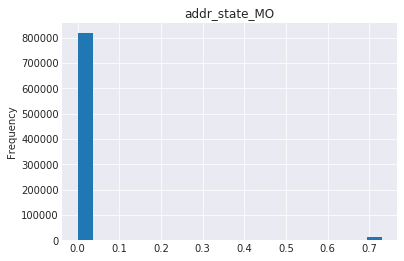

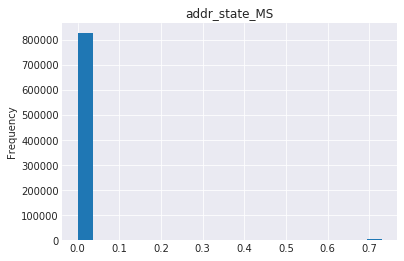

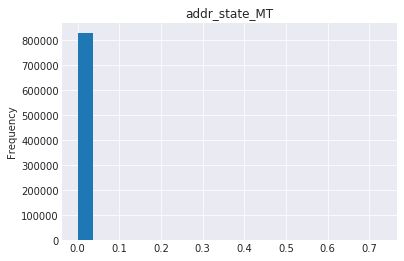

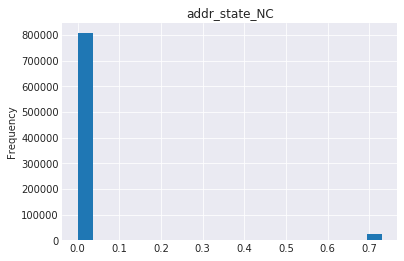

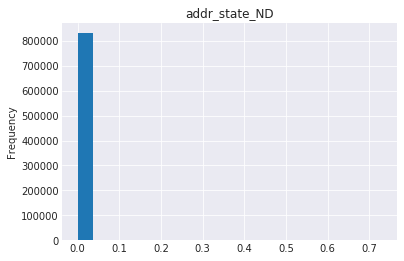

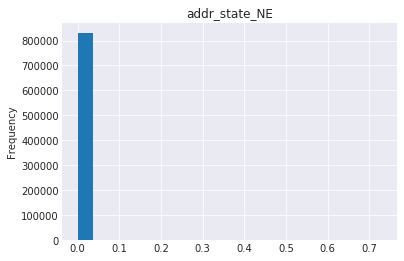

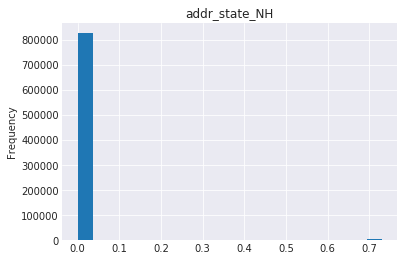

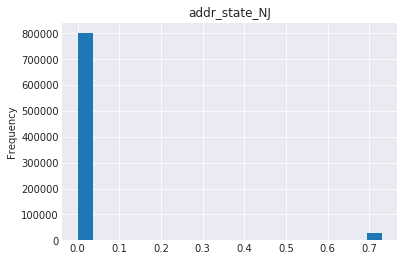

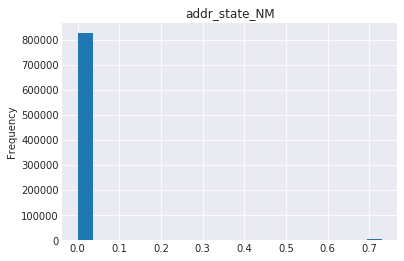

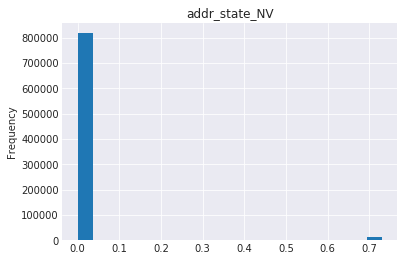

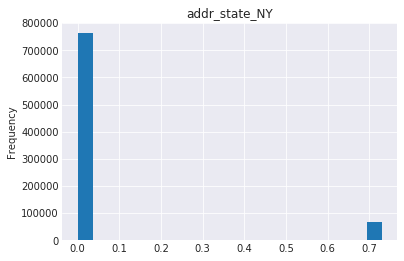

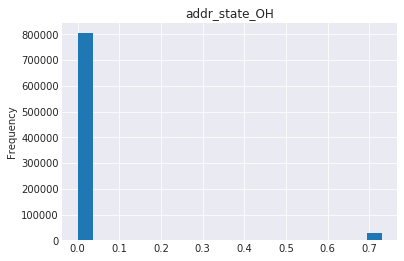

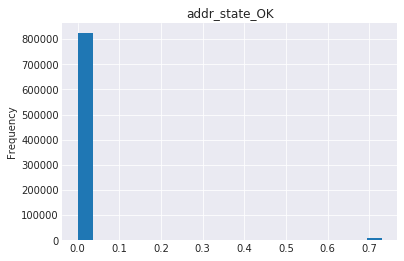

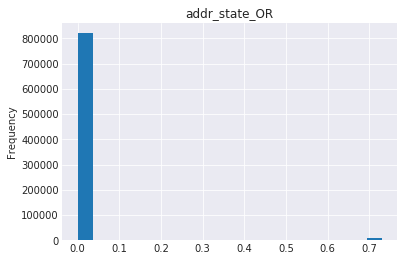

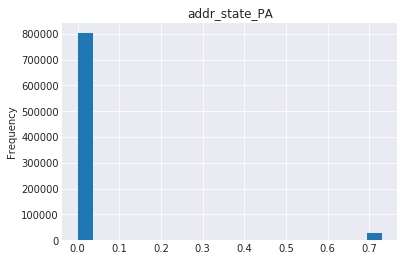

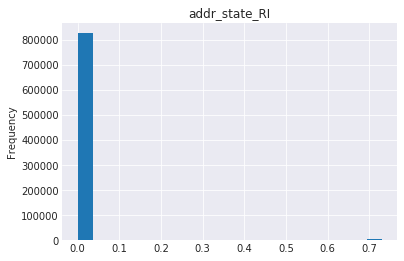

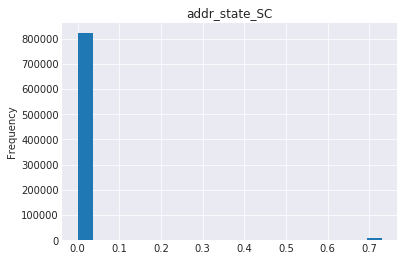

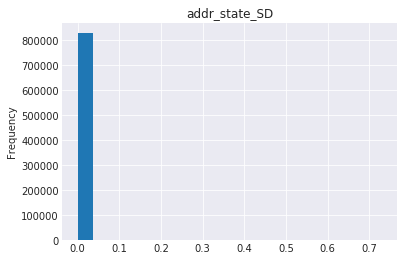

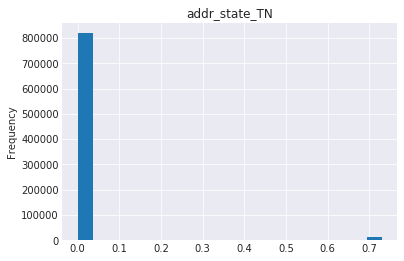

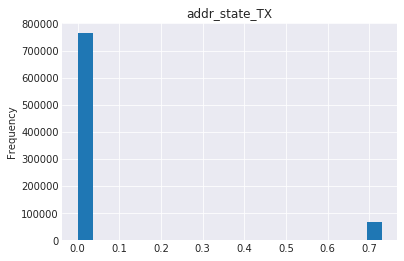

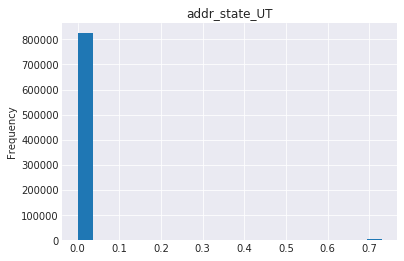

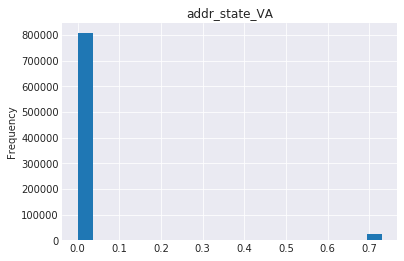

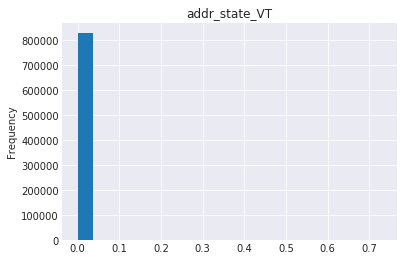

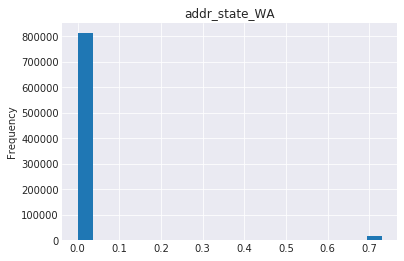

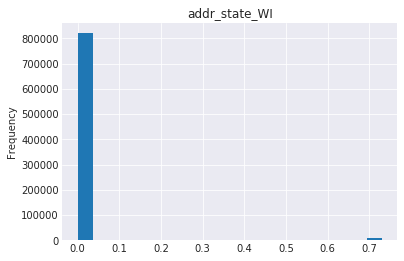

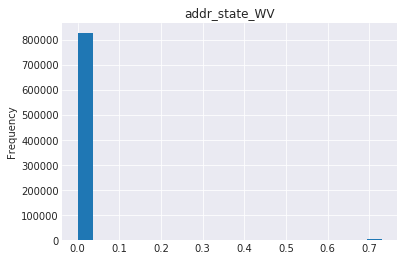

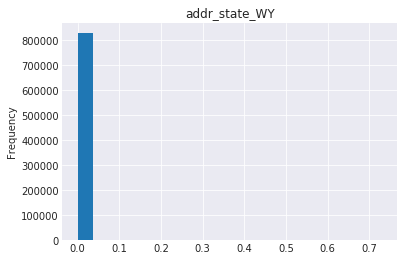

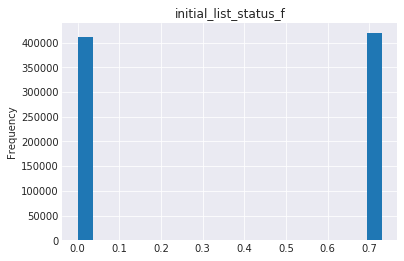

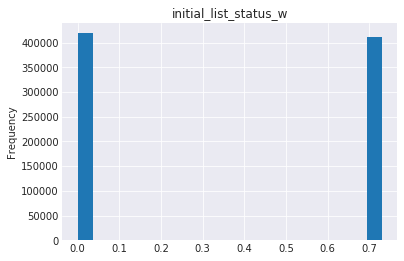

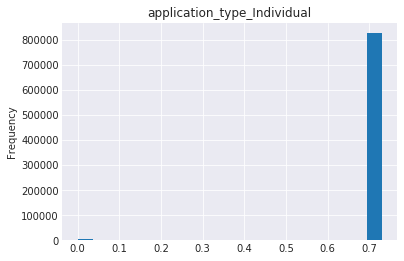

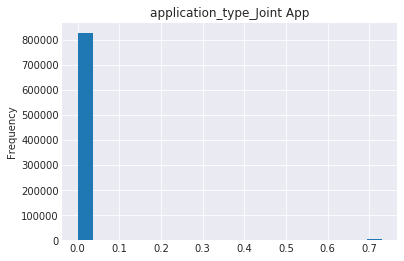

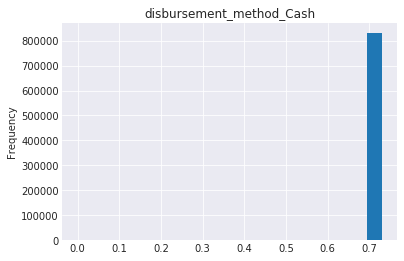

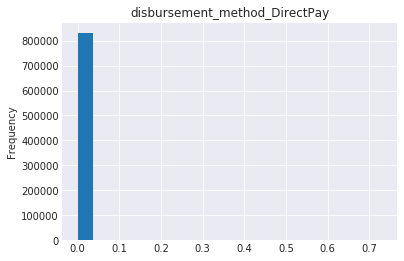

In [16]:
for y in df.columns:
    plt.figure()
    df[y].plot.hist(bins=20, title=y)
    plt.show()

In [18]:
# Split the data in features and target label
loan_status_raw = df['loan_status']
loan_status = loan_status_raw.apply(lambda x: int(x > 0.1))
features = df.drop('loan_status', axis=1)

from sklearn.cross_validation import train_test_split

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

Training set has 664548 samples.
Testing set has 166137 samples.
GaussianNB trained on 664548 samples.
{'train_time': 2.734783172607422, 'pred_time': 0.6790218353271484, 'acc_train': 0.6521771188838128, 'acc_test': 0.6524434653328277, 'f_train': 0.8181464318900749, 'f_test': 0.8187364729062556}
DecisionTreeRegressor trained on 664548 samples.
{'train_time': 62.32818841934204, 'pred_time': 0.16397547721862793, 'acc_train': 1.0, 'acc_test': 0.7663614968369479, 'f_train': 1.0, 'f_test': 0.8549066919387163}
